In [14]:
#Importing libraries and dependencies
import pandas as pd
import yfinance as yf
import requests
import numpy as np
import hvplot.pandas
import matplotlib.pyplot as plt
import datetime as dt
import json
import csv
import os

In [15]:
# Load the CSV file into a Pandas DataFrame
file_path = 'bulk_output.csv'  # This is the file path for the CSV file
data = pd.read_csv(file_path)
# Display the first few rows of the data to understand its structure
data.head()

,Representative,BioGuideID,TransactionDate,Ticker,Transaction,Range,House,Amount,Party
0,Rudy Yakym Iii,Y000067,2024-09-26,MATURE,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
1,Marjorie Taylor Mrs Greene,G000596,2024-09-20,GOOG,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
2,Marjorie Taylor Mrs Greene,G000596,2024-09-20,CRWD,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
3,Marjorie Taylor Mrs Greene,G000596,2024-09-20,BX,Purchase,"$1,001 - $15,000",Representatives,1001.0,R
4,Marjorie Taylor Mrs Greene,G000596,2024-09-20,LRCX,Purchase,"$1,001 - $15,000",Representatives,1001.0,R


In [16]:
#The dataset includes 'Ticker" column relevant for analysis:

#Analysis Plan:
#Filter the data for Nancy Pelosi's trades.
#Group by the Ticker to see which stocks are traded most frequently.
#Visualize the results using bar plots to show the most traded stocks by Congress as a whole and by Nancy Pelosi.
  

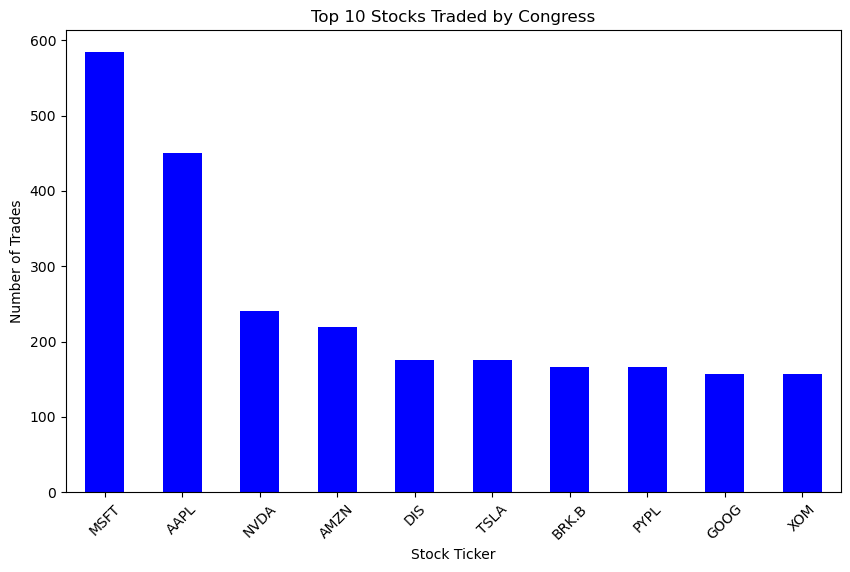

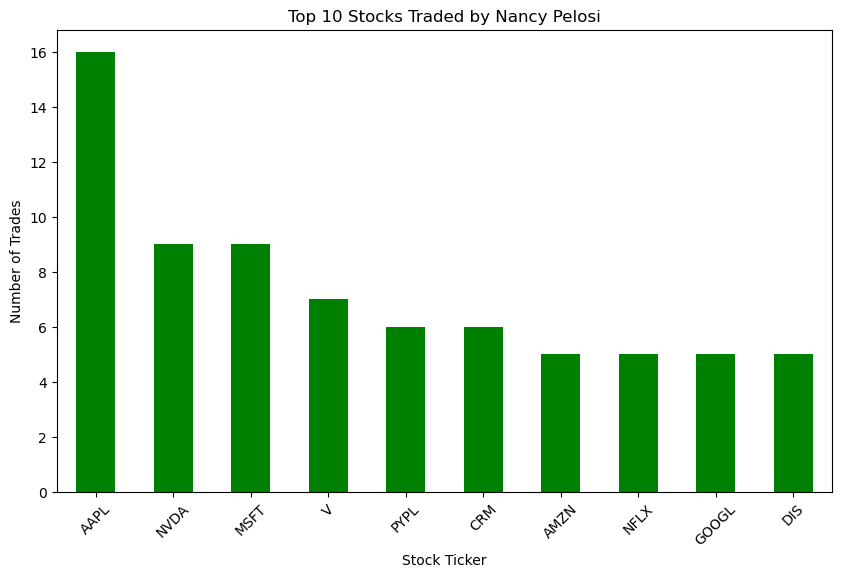

In [18]:
# Filter data for Nancy Pelosi
pelosi_data = data[data['Representative'].str.contains("Pelosi", case=False, na=False)]

# Count the number of trades per stock ticker for Congress overall
congress_ticker_counts = data['Ticker'].value_counts().head(10)

# Count the number of trades per stock ticker for Pelosi
pelosi_ticker_counts = pelosi_data['Ticker'].value_counts().head(10)

# Plot top 10 tickers traded by Congress
plt.figure(figsize=(10, 6))
congress_ticker_counts.plot(kind='bar', color='blue')
plt.title('Top 10 Stocks Traded by Congress')
plt.xlabel('Stock Ticker')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.show()

# Plot top 10 tickers traded by Nancy Pelosi
plt.figure(figsize=(10, 6))
pelosi_ticker_counts.plot(kind='bar', color='green')
plt.title('Top 10 Stocks Traded by Nancy Pelosi')
plt.xlabel('Stock Ticker')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.show()


In [19]:

##The bar charts above display the following insights:

#Top 10 Stocks Traded by Congress: The first chart shows the most frequently traded stocks by Congress as a whole. 
#This helps identify companies that seem to attract repeated interest across different representatives.
#Top 10 Stocks Traded by Nancy Pelosi: The second chart highlights the stocks that Nancy Pelosi has traded most frequently.
#This gives a sense of her stock trading preferences.
#From these visualizations, you can identify which stocks or sectors are of particular interest. 
#To dive deeper into sector-based analysis,map the Ticker to specific sectors (e.g., tech,finance) and visualize sector-level patterns.


/var/folders/mn/94ty2hln1nlgynrs6rr0zsdm0000gn/T/ipykernel_21939/1583011231.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pelosi_data['Sector'] = pelosi_data['Ticker'].map(sector_mapping)


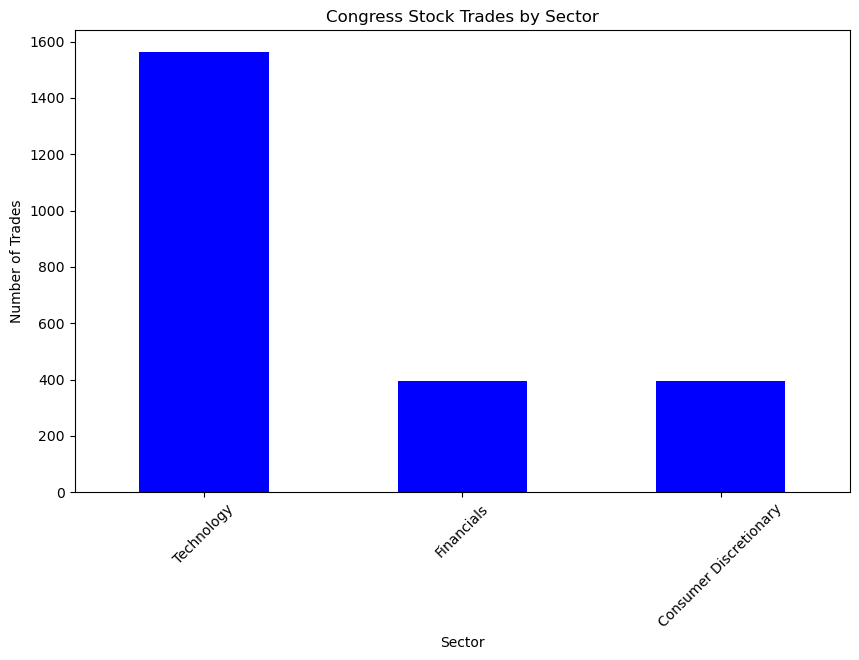

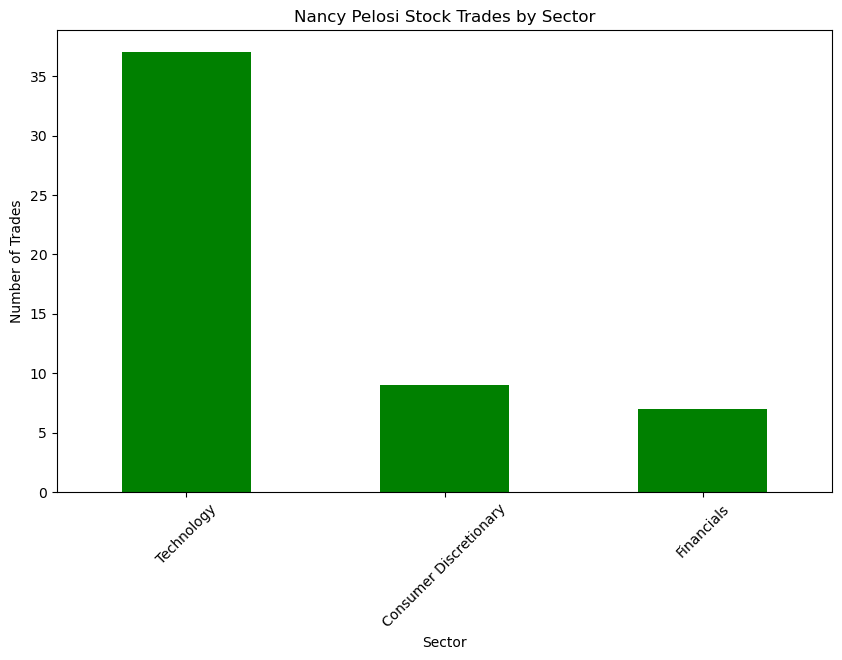

In [20]:

# For sector analysis, create a mapping of stock tickers to sectors.

# Sector mapping 
sector_mapping = {
    'GOOG': 'Technology',
    'CRWD': 'Technology',
    'AAPL': 'Technology',
    'AMZN': 'Consumer Discretionary',
    'TSLA': 'Consumer Discretionary',
    'MSFT': 'Technology',
    'NVDA': 'Technology',
    'META': 'Technology',
    'BAC': 'Financials',
    'V': 'Financials',
    'JPM': 'Financials',
    'LRCX': 'Technology',
    'BX': 'Financials'
}

# Map tickers to sectors for the entire Congress data
data['Sector'] = data['Ticker'].map(sector_mapping)

# Map tickers to sectors for Pelosi's data
pelosi_data['Sector'] = pelosi_data['Ticker'].map(sector_mapping)

# Analyze the sector distribution for Pelosi and Congress overall
congress_sector_counts = data['Sector'].value_counts()
pelosi_sector_counts = pelosi_data['Sector'].value_counts()

# Filter Pelosi's sales and find the largest ones by Amount
pelosi_sales = pelosi_data[pelosi_data['Transaction'] == 'Sale']
largest_pelosi_sales = pelosi_sales.sort_values(by='Amount', ascending=False).head(10)

# Plot sector trends for Congress and Pelosi
plt.figure(figsize=(10, 6))
congress_sector_counts.plot(kind='bar', color='blue')
plt.title('Congress Stock Trades by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
pelosi_sector_counts.plot(kind='bar', color='green')
plt.title('Nancy Pelosi Stock Trades by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.show()


In [21]:
# Key Takeaways 

#Technology Dominates: Both Pelosi and Congress as a whole show a strong focus on technology, likely reflecting the sector’s prominence in the market.
#Balanced Diversification: While tech dominates, there is still some balanced trading in Financials and Consumer Discretionary sectors, indicating a diversified investment approach.
#Congressional Patterns: Congress members' overall behavior mirrors Pelosi’s in terms of sector preference, suggesting that technology is a shared point of focus.

